# Inhibitory-stabilized rate sequence network

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from my_stats import get_cmn_p
from disp import set_plot

N = 128
thetas = np.linspace(0, 2*np.pi, N)

DT = .00005

def make_J(N, g):
    J = np.diag(np.ones(N-1), -1)
    J[0, -1] = 1
    J *= g
    return J

def relu(x):
    return np.where(x > 0, x, 0)

In [2]:
TAU = .01
M_0 = .5
BETA = 2
phi_z = lambda r: np.exp(BETA*(np.mean(r) - M_0))


def smlt(t, J, J_Z):
    hs = np.nan*np.zeros((len(t), N))
    hs[0, :] = np.eye(N)[0, :]
    
    rs = np.nan*np.zeros((len(t), N))
    rs[0, :] = relu(hs[0, :])  #np.eye(N)[0, :]

    zs = np.nan*np.zeros((len(t), 1))
    zs[0, :] = phi_z(rs[0, :])

    for ct, t_ in enumerate(t[1:], 1):
        dh = (DT/TAU)*(-hs[ct-1, :] + J@rs[ct-1, :] + J_Z@zs[ct-1, :])
        h = hs[ct-1, :] + dh
        hs[ct, :] = h.copy()
        
        rs[ct, :] = relu(h)

        z = phi_z(rs[ct, :])
        zs[ct, :] = [z]
        
    return rs, zs

In [3]:
GS = [1.2, 5, 10, 20, 30, 50]
J_Z = -0.05*np.ones((N, 1))

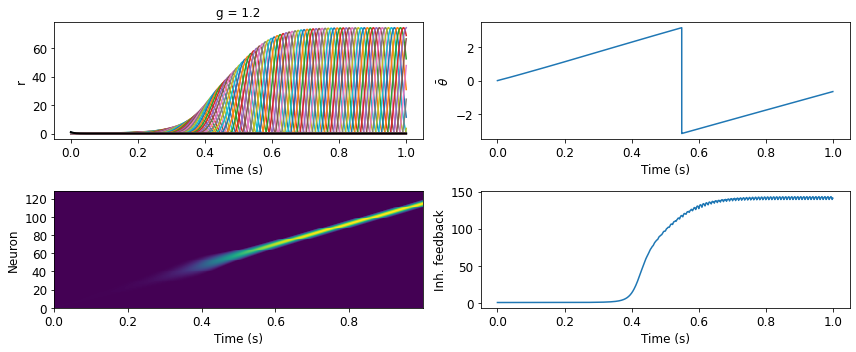

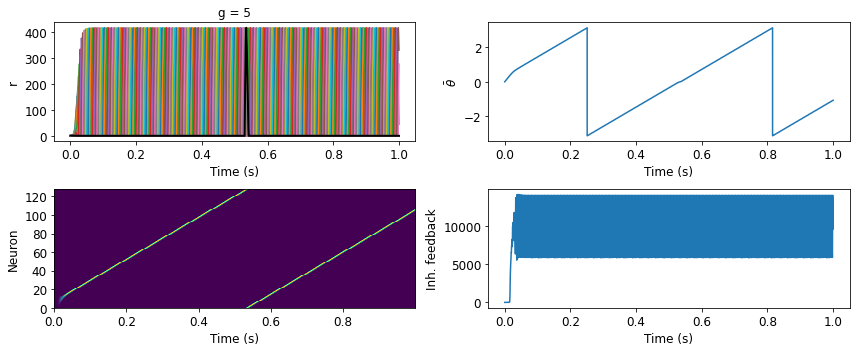

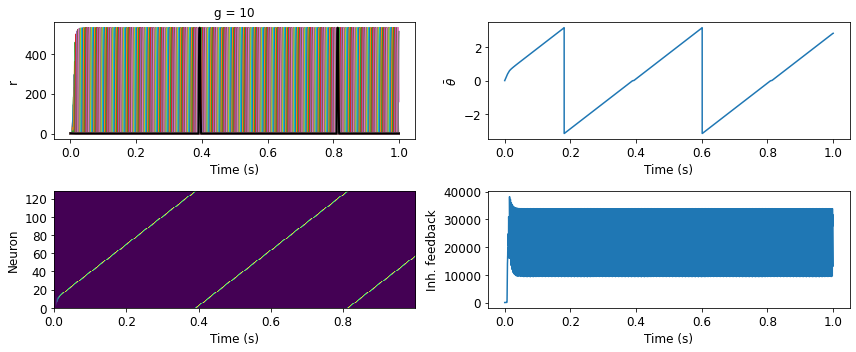

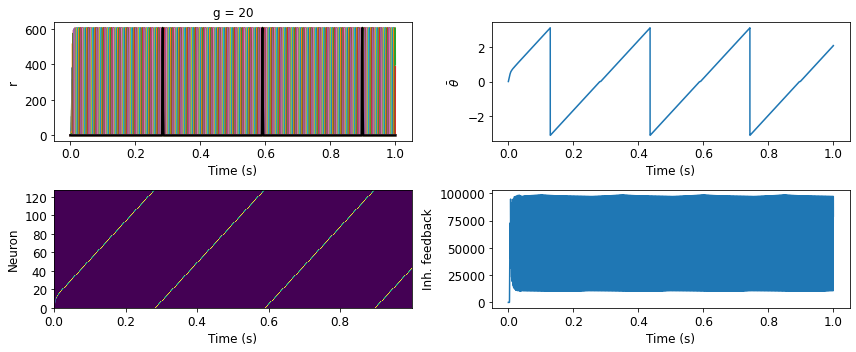

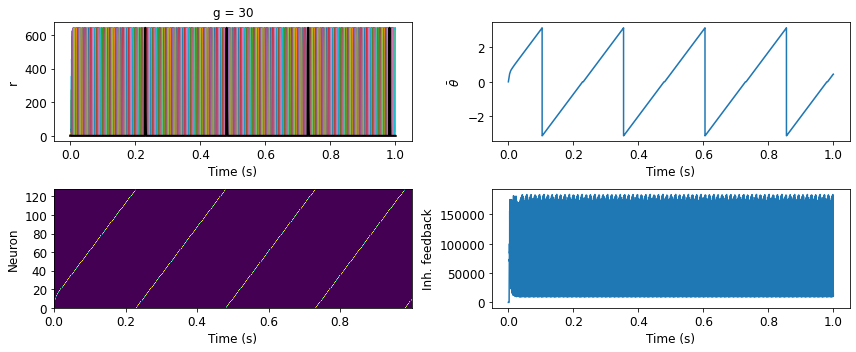

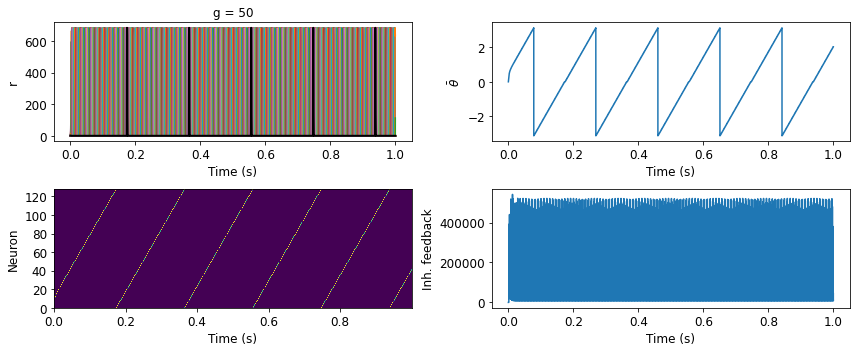

In [4]:
t = np.arange(0, 1, DT)

for g in GS:
    J = make_J(N, g)
    rs, zs = smlt(t, J, J_Z)

    ps = np.array([r/np.sum(r) for r in rs])
    cmns = np.array([get_cmn_p(thetas, p) for p in ps])

    fig, axs = plt.subplots(2, 2, figsize=(12, 5), tight_layout=True)
    axs = axs.flatten()
    axs[0].plot(t, rs)
    axs[0].plot(t, rs[:, 0], c='k', lw=2)
    
    set_plot(axs[0], x_label='Time (s)', y_label='r', title=f'g = {g}')
    axs[1].plot(t, cmns)
    set_plot(axs[1], y_lim=(-1.1*np.pi, 1.1*np.pi), x_label='Time (s)', y_label=r'$\bar{\theta}$')
    
    axs[2].matshow(rs.T, origin='lower', extent=[t[0], t[-1], 0, N])
    axs[2].set_aspect('auto')
    axs[2].xaxis.tick_bottom()
    set_plot(axs[2], x_label='Time (s)', y_label='Neuron')
    
    axs[3].plot(t, zs[:, 0])
    set_plot(axs[3], x_label='Time (s)', y_label='Inh. feedback')